In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [44]:
from main.data_tools.extract_ntuples import get_pd, get_np

In [45]:
file_name = '/media/jykim/T7/storage/ref_study/ntuples/D2kpkm_signal_own_1M.root'
base_filter = 'D0_M>1.84 && D0_M<1.89 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && ref_phi_rank_Dstp==1'
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p',"Dstarp_isSignal"]

In [46]:
pd_df_test = get_pd(file=file_name, tree='ref_phi',base_filter=base_filter,variables=signal_variables)

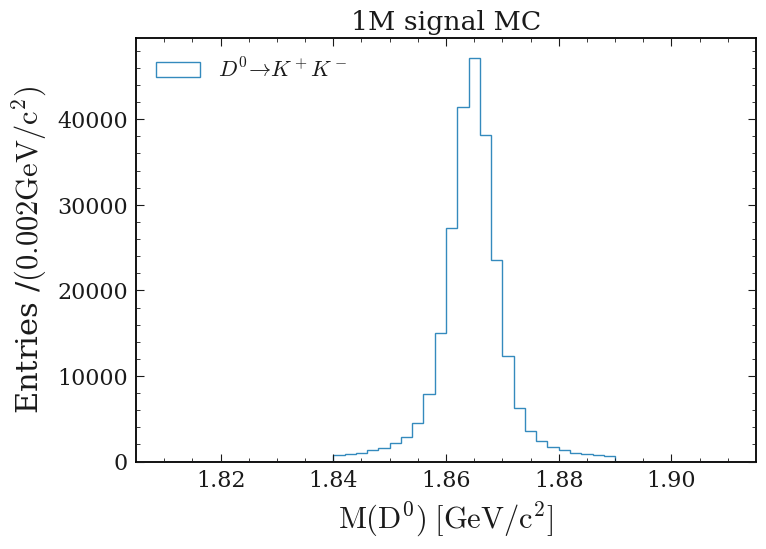

In [47]:
fig = plt.figure()
ax = fig.subplots()
xrange = (1.81,1.91,51)

xm = np.linspace(*xrange)

df = pd_df_test
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to K^+ K^-$');

plt.legend(loc="upper left")
ax.set_title(r'1M signal MC' )

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.81,1.91))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [48]:
file_name = '/media/jykim/T7/storage/ref_study/ntuples/D2kpkm_signal_own_1M.root'
base_filter = 'D0_M>1.84 && D0_M<1.89 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.4 && ref_phi_rank_Dstp==1'
signal_variables = ['D0_M','Dstarp_Q','Dstarp_CMS_p',"Dstarp_isSignal"]

In [49]:
np_data = get_np(file=file_name, tree='ref_phi',base_filter=base_filter,variables=signal_variables)

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.1] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [0, 0.1] of the RooGaussian 'sig2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.84,1.89]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.84,1.89]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.84,1.89]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file rf204a_extendedLikelihood.png has been created


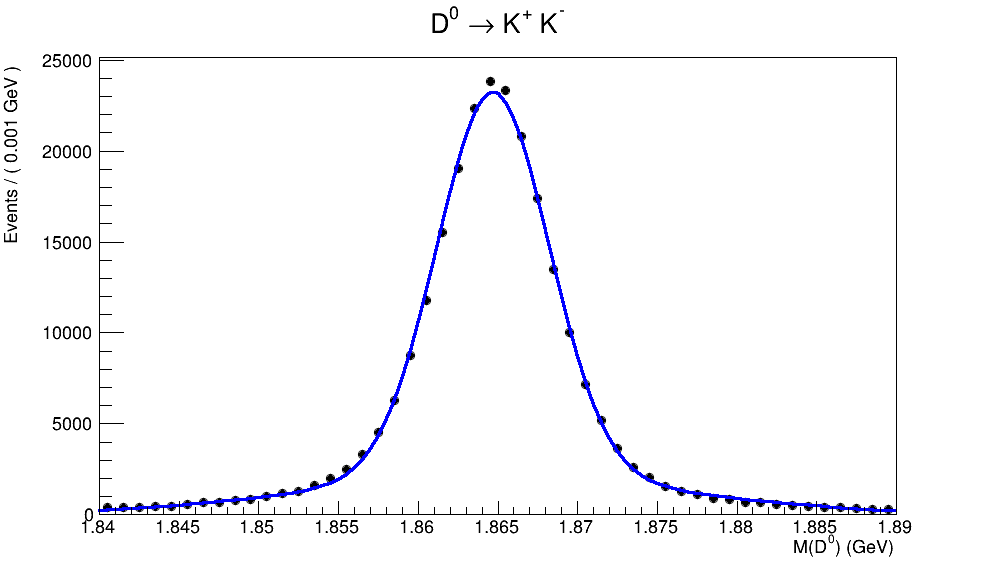

In [50]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0})", 1.84, 1.89, "GeV")
x.setBins(50)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.1)
 
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.7, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig1, sig2], sig1frac)

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 1000, 600)

r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r.Print()
 
frame = x.frame(Title="D^{0} #rightarrow K^{+} K^{-}")
data.plotOn(frame, XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame)
# sig.paramOn(frame)
frame.Draw()

canv.Draw()
canv.SaveAs("rf204a_extendedLikelihood.png")


In [76]:
yup

1.0

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.1] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [0, 0.1] of the RooGaussian 'sig2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.84,1.89]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.84,1.89]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_sig_' created with bounds [1.84,1.89]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_sig_) fixing interpretation of coefficients of any RooAddPdf to full domain

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file rf204a_extendedLikelihood.png has been created


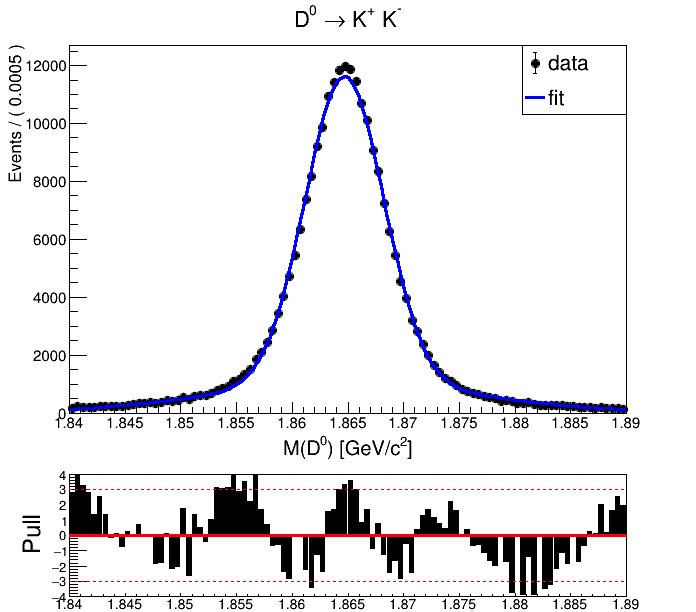

In [189]:
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", 1.84, 1.89, "")
x.setBins(100)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.84, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.1)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0,0.1)
 
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.7, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig1, sig2], sig1frac)

data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

r = sig.fitTo(data,NumCPU=12, Range=(1.84,1.89))
# r.Print()
canv.cd(1) 
frame = x.frame(Title="D^{0} #rightarrow K^{+} K^{-}")
data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig1.plotOn(frame, LineStyle="--", LineColor="r")
# sig2.plotOn(frame, LineStyle="--", LineColor="r")
sig.plotOn(frame, Name="fit1")
# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "data", "PE")
leg1.AddEntry("fit1", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(1.84)
xmax1 = ctypes.c_double(1.89)
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("rf204a_extendedLikelihood.png")

chi^2 =  2.2678609242143475


Warning in <TCanvas::Constructor>: Deleting canvas with same name: rf109_chi2residpull
Info in <TCanvas::Print>: png file rf109_chi2residpull.png has been created


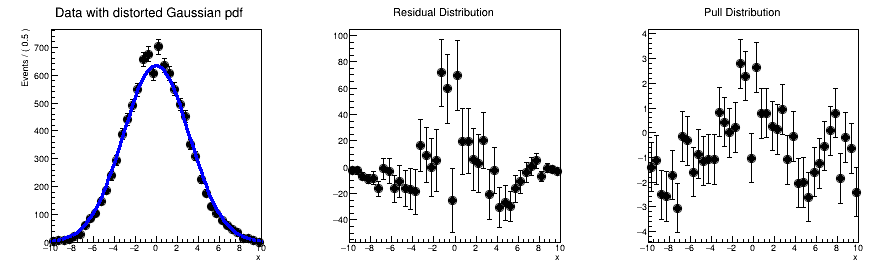

In [5]:
# Set up model
# ---------------------
 
# Create observables
x = ROOT.RooRealVar("x", "x", -10, 10)
 
# Create Gaussian
sigma = ROOT.RooRealVar("sigma", "sigma", 3, 0.1, 10)
mean = ROOT.RooRealVar("mean", "mean", 0, -10, 10)
gauss = ROOT.RooGaussian("gauss", "gauss", x, mean, sigma)
 
# Generate a sample of 1000 events with sigma=3
data = gauss.generate({x}, 10000)
 
# Change sigma to 3.15
sigma.setVal(3.15)
 
# Plot data and slightly distorted model
# ---------------------------------------------------------------------------
 
# Overlay projection of gauss with sigma=3.15 on data with sigma=3.0
frame1 = x.frame(Title="Data with distorted Gaussian pdf", Bins=40)
data.plotOn(frame1, DataError="SumW2")
gauss.plotOn(frame1)
 
# Calculate chi^2
# ------------------------------
 
# Show the chi^2 of the curve w.r.t. the histogram
# If multiple curves or datasets live in the frame you can specify
# the name of the relevant curve and/or dataset in chiSquare()
print("chi^2 = ", frame1.chiSquare())
 
# Show residual and pull dists
# -------------------------------------------------------
 
# Construct a histogram with the residuals of the data w.r.t. the curve
hresid = frame1.residHist()
 
# Construct a histogram with the pulls of the data w.r.t the curve
hpull = frame1.pullHist()
 
# Create a frame to draw the residual distribution and add the
# distribution to the frame
frame2 = x.frame(Title="Residual Distribution")
frame2.addPlotable(hresid, "P")
 
# Create a frame to draw the pull distribution and add the distribution to
# the frame
frame3 = x.frame(Title="Pull Distribution")
frame3.addPlotable(hpull, "PE")
 
c = ROOT.TCanvas("rf109_chi2residpull", "rf109_chi2residpull", 900, 300)
c.Divide(3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.6)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.6)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()

c.Draw()
c.SaveAs("rf109_chi2residpull.png")

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [-1e+30, 1e+30] of the RooGaussian 'sig2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: rf202_extendedmlfit
Info in <TCanvas::Print>: png file rf202_extendedmlfit.png has been created


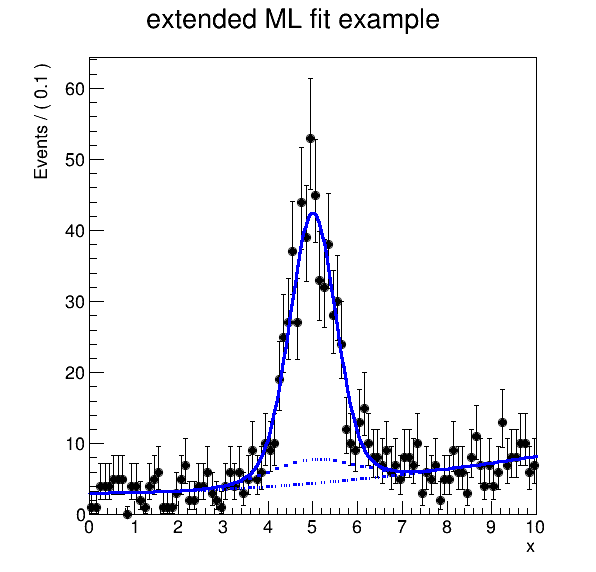

In [9]:
# Set up component pdfs
# ---------------------------------------
 
# Declare observable x
x = ROOT.RooRealVar("x", "x", 0, 10)
 
# Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
# their parameters
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)
 
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)
 
# Build Chebychev polynomial pdf
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0.0, 1.0)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0.0, 1.0)
bkg = ROOT.RooChebychev("bkg", "Background", x, [a0, a1])
 
# Sum the signal components into a composite signal pdf
sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.8, 0.0, 1.0)
sig = ROOT.RooAddPdf("sig", "Signal", [sig1, sig2], [sig1frac])
 
# Method 1 - Construct extended composite model
# -------------------------------------------------------------------
 
# Sum the composite signal and background into an extended pdf
# nsig*sig+nbkg*bkg
nsig = ROOT.RooRealVar("nsig", "number of signal events", 500, 0.0, 10000)
nbkg = ROOT.RooRealVar("nbkg", "number of background events", 500, 0, 10000)
model = ROOT.RooAddPdf("model", "(g1+g2)+a", [bkg, sig], [nbkg, nsig])
 
# Sample, fit and plot extended model
# ---------------------------------------------------------------------
 
# Generate a data sample of expected number events in x from model
# = model.expectedEvents() = nsig+nbkg
data = model.generate({x})
 
# Fit model to data, ML term automatically included
model.fitTo(data)
 
# Plot data and PDF overlaid, expected number of events for pdf projection normalization
# rather than observed number of events (==data.numEntries())
xframe = x.frame(Title="extended ML fit example")
data.plotOn(xframe)
model.plotOn(xframe, Normalization=dict(scaleFactor=1.0, scaleType=ROOT.RooAbsReal.RelativeExpected))
 
# Overlay the background component of model with a dashed line
model.plotOn(
    xframe,
    Components={bkg},
    LineStyle=":",
    Normalization=dict(scaleFactor=1.0, scaleType=ROOT.RooAbsReal.RelativeExpected),
)
 
# Overlay the background+sig2 components of model with a dotted line
ras_bkg_sig2 = {bkg, sig2}
model.plotOn(
    xframe,
    Components=ras_bkg_sig2,
    LineStyle=":",
    Normalization=dict(scaleFactor=1.0, scaleType=ROOT.RooAbsReal.RelativeExpected),
)
 
# Print structure of composite pdf
model.Print("t")
 
 
# Method 2 - Construct extended components first
# ---------------------------------------------------------------------
 
# Associated nsig/nbkg as expected number of events with sig/bkg
esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig, nsig)
ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg, nbkg)
 
# Sum extended components without coefs
# -------------------------------------------------------------------------
 
# Construct sum of two extended pdf (no coefficients required)
model2 = ROOT.RooAddPdf("model2", "(g1+g2)+a", [ebkg, esig])
 
# Draw the frame on the canvas
c = ROOT.TCanvas("rf202_extendedmlfit", "rf202_extendedmlfit", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
 
c.Draw()   
c.SaveAs("rf202_extendedmlfit.png")